In [1]:
import math

def attempts_for_one_successful_identification(prob_threshold, p):
    """
    Calculate the number of attempts (samples) needed for one successful identification
    with a certain probability threshold.

    Parameters:
        prob_threshold (float): The desired probability threshold (0 <= prob_threshold <= 1).
        p (float): Probability of identifying the category for each sample analyzed (0 <= p <= 1).

    Returns:
        int: The number of attempts needed for one successful identification.
    """
    if not (0 <= prob_threshold <= 1):
        raise ValueError("Probability threshold must be between 0 and 1 (inclusive).")

    n = 0
    cumulative_probability = 0

    while cumulative_probability < prob_threshold:
        probability = math.comb(n, 1) * p * (1 - p) ** (n - 1)
        cumulative_probability += probability
        n += 1

    return n

# Example usage:
probability_threshold = 0.95  # The desired probability threshold (e.g., 0.95 for 95% confidence)
probability_success = 0.8

attempts_needed = attempts_for_one_successful_identification(probability_threshold, probability_success)
print(f"The number of attempts needed for one successful identification with a {probability_threshold * 100:.2f}% probability is: {attempts_needed}")


The number of attempts needed for one successful identification with a 95.00% probability is: 3


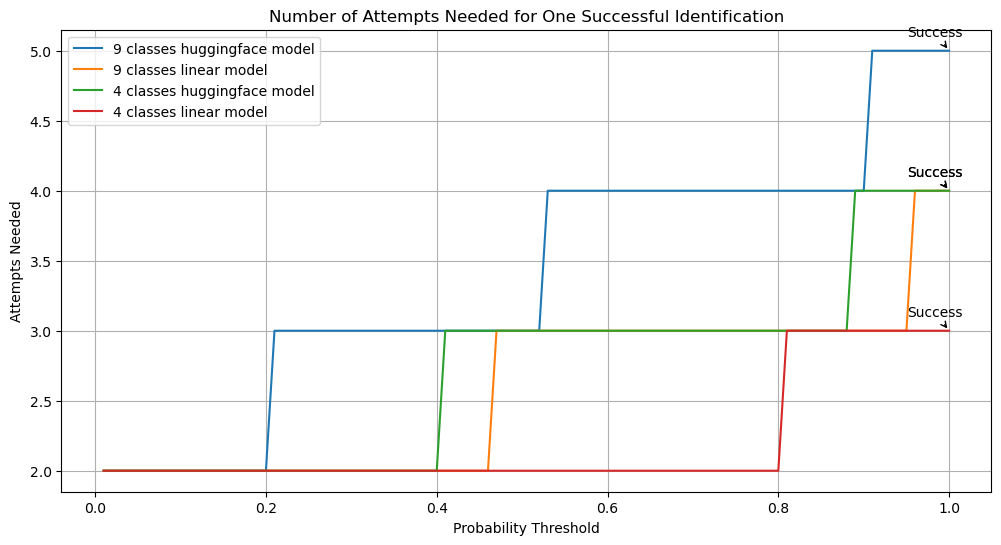

In [11]:
import math
import pandas as pd
import matplotlib.pyplot as plt

probabilities_of_success = {
    0.2: '9_hf',
    0.46: '9_linear',
    0.4: '4_hf',
    0.8: '4_linear'
}


# Create a DataFrame to store the results
data = {
    'Probability Threshold': [i/100 for i in range(1, 101)],  # Probability thresholds from 0.01 to 1.00
}

# Calculate the attempts needed for each probability and store them in separate columns
for prob, prob_name in probabilities_of_success.items():
    data[f'Attempts for {prob_name} Success'] = [attempts_for_one_successful_identification(threshold, prob) for threshold in data['Probability Threshold']]

df = pd.DataFrame(data)

# Plot the attempts needed for each probability on the same grid
for prob, prob_name in probabilities_of_success.items():
    plt.plot(df['Probability Threshold'], df[f'Attempts for {prob_name} Success'], label=f'{prob_name} Success')

    # Add annotations for each probability at the last data point
    plt.annotate(f'Success', xy=(df['Probability Threshold'].values[-1], df[f'Attempts for {prob_name} Success'].values[-1]),
                 xytext=(-30, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.xlabel('Probability Threshold')
plt.ylabel('Attempts Needed')
plt.title('Number of Attempts Needed for One Successful Identification')
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'Attempts for 9 classes huggingface model Success'

<Figure size 1000x600 with 0 Axes>